# Titanic Data

In [2]:
import pandas as pd
TitanicFrame = pd.read_csv('Train.csv', header = 0)

In [4]:
TitanicFrame.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
TitanicFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


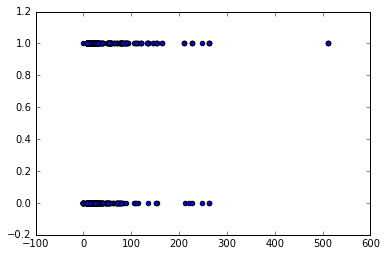

In [6]:
plt.scatter(TitanicFrame['Fare'], TitanicFrame['Survived'])

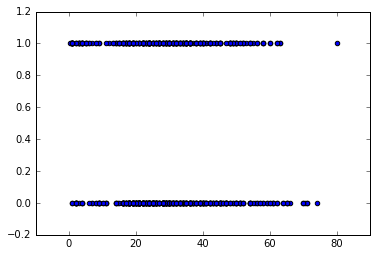

In [7]:
plt.scatter(TitanicFrame['Age'], TitanicFrame['Survived'])

In [8]:
grouped = TitanicFrame.loc[:,['Survived','Age']].groupby('Age').sum().reset_index()
grouped[grouped['Age']<=2]
#plt.bar(grouped['Age'], grouped['Survived'])

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,5
6,2.00,3


In [9]:
grouped1 = TitanicFrame.loc[:,['Survived','Age']].groupby('Age').count().reset_index()
grouped1[grouped1['Age']<=2]
#plt.bar(grouped1['Age'], grouped['Survived'])

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,7
6,2.00,10


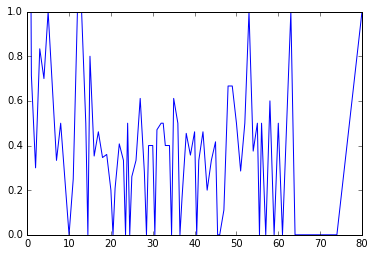

In [10]:
grouped2 = pd.merge(grouped1,grouped, how='outer', on = ['Age', 'Age'])
grouped2['Ratio']= grouped2['Survived_y'] / grouped2['Survived_x']
plt.plot(grouped2['Age'], grouped2['Ratio'])

In [58]:
TitanicFrame[TitanicFrame['Age']==.42]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


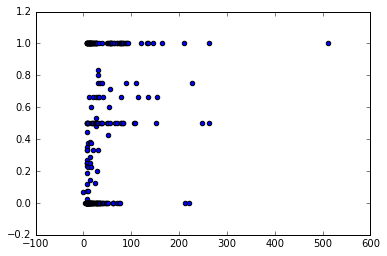

In [14]:
grouped = TitanicFrame.loc[:,['Survived','Fare']].groupby('Fare').sum().reset_index()
grouped1 = TitanicFrame.loc[:,['Survived','Fare']].groupby('Fare').count().reset_index()
grouped2 = pd.merge(grouped1,grouped, how='outer', on = ['Fare', 'Fare'])
grouped2['Ratio']= grouped2['Survived_y'] / grouped2['Survived_x']
plt.scatter(grouped2['Fare'], grouped2['Ratio'])

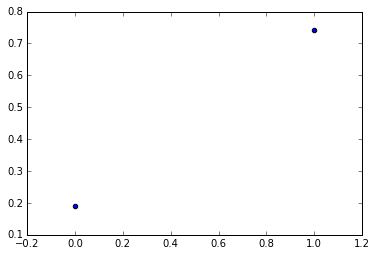

In [27]:
TitanicFrame['Gender'] = TitanicFrame['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
grouped = TitanicFrame.loc[:,['Survived','Gender']].groupby('Gender').sum().reset_index()
grouped1 = TitanicFrame.loc[:,['Survived','Gender']].groupby('Gender').count().reset_index()
grouped2 = pd.merge(grouped1,grouped, how='outer', on = ['Gender', 'Gender'])
grouped2['Ratio']= grouped2['Survived_y'] / grouped2['Survived_x']
plt.scatter(grouped2['Gender'], grouped2['Ratio'])

In [33]:
TitanicFrame[(TitanicFrame['Age'].isnull())] ##| (TitanicFrame['Sex'].isnull()) | (TitanicFrame['Fare'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0


Need to fill in the missing data and recalculate the correlation

In [35]:
Median_ages = [[0]*3]*2
for i in range(0, 2):
    for j in range(0, 3):
        Median_ages[i,j] = TitanicFrame[(TitanicFrame['Gender'] == i) & \
                              (TitanicFrame['Pclass'] == j+1)]['Age'].dropna().median()

TypeError: list indices must be integers, not tuple